IMPORT FILE

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

pasien = pd.read_csv('/content/drive/MyDrive/patient.csv')
cases_conf = pd.read_csv('/content/drive/MyDrive/confirmed_acc.csv')
provinsi = pd.read_csv('//content/drive/MyDrive/province.csv',encoding = 'Unicode_escape')

In [21]:
# melihat data pertama

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [22]:
cases_conf.head()

,date,cases
0,1/22/2020,0
1,1/23/2020,0
2,1/24/2020,0
3,1/25/2020,0
4,1/26/2020,0


PREPROCESSING

In [23]:
# urutkan data dari tgl paling baru

(cases_conf[cases_conf['cases'] == 0].sort_values(by=['date'], ascending=False)).head()

,date,cases
39,3/1/2020,0
18,2/9/2020,0
17,2/8/2020,0
16,2/7/2020,0
15,2/6/2020,0


In [24]:
# konversi tanggal menjadi total hari

df = cases_conf.iloc[39:]
df['days'] = df['date'].map(lambda x: (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime("3/1/2020", '%m/%d/%Y')).days)
df = df[['date', 'days', 'cases']]  # Mengatur ulang urutan kolom
print(df)

         date  days  cases
39   3/1/2020     0      0
40   3/2/2020     1      2
41   3/3/2020     2      2
42   3/4/2020     3      2
43   3/5/2020     4      2
44   3/6/2020     5      4
45   3/7/2020     6      4
46   3/8/2020     7      6
47   3/9/2020     8     19
48  3/10/2020     9     27
49  3/11/2020    10     34
50  3/12/2020    11     34
51  3/13/2020    12     69
52  3/14/2020    13     96
53  3/15/2020    14    117
54  3/16/2020    15    134
55  3/17/2020    16    172
56  3/18/2020    17    227
57  3/19/2020    18    309
58  3/20/2020    19    369
59  3/21/2020    20    450
60  3/22/2020    21    514
61  3/23/2020    22    579
62  3/24/2020    23    685
63  3/25/2020    24    790
64  3/26/2020    25    893
65  3/27/2020    26   1046
66  3/28/2020    27   1155
67  3/29/2020    28   1285


<ipython-input-24-f809e666fb06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days'] = df['date'].map(lambda x: (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime("3/1/2020", '%m/%d/%Y')).days)


PROCESSING

FUNCTION AND METHOD PREDICTION

In [25]:

def gompertz(a, c, t, t_0):
    q = a * np.exp(-np.exp(-c*(t-t_0)))
    return q

x = list(df['days'])
y = list(df['cases'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9, test_size=0.1, shuffle=False)
x_test_added = x_test + list(range((max(x_test)+1), 60))
popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([100, 0, 0],[6*max(y_train),0.15, 70]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train+x_test_added, estimated_t_0)

y_pred

<ipython-input-25-bd70ade78aba>:2: RuntimeWarning: overflow encountered in exp
  q = a * np.exp(-np.exp(-c*(t-t_0)))


array([2.75900916e-03, 7.48081705e-03, 1.88731200e-02, 4.45347338e-02,
       9.87672146e-02, 2.06791278e-01, 4.10452692e-01, 7.75320031e-01,
       1.39875083e+00, 2.41815038e+00, 4.01835012e+00, 6.43687424e+00,
       9.96590225e+00, 1.49499909e+01, 2.17790588e+01, 3.08766875e+01,
       4.26843643e+01, 5.76427794e+01, 7.61716321e+01, 9.86495428e+01,
       1.25395617e+02, 1.56653977e+02, 1.92582245e+02, 2.33244535e+02,
       2.78609109e+02, 3.28550483e+02, 3.82855466e+02, 4.41232400e+02,
       5.03322779e+02, 5.68714377e+02, 6.36955062e+02, 7.07566567e+02,
       7.80057632e+02, 8.53936024e+02, 9.28719142e+02, 1.00394299e+03,
       1.07916949e+03, 1.15399203e+03, 1.22803953e+03, 1.30097895e+03,
       1.37251656e+03, 1.44239812e+03, 1.51040810e+03, 1.57636822e+03,
       1.64013544e+03, 1.70159950e+03, 1.76068027e+03, 1.81732490e+03,
       1.87150494e+03, 1.92321351e+03, 1.97246252e+03, 2.01928004e+03,
       2.06370781e+03, 2.10579903e+03, 2.14561619e+03, 2.18322924e+03,
      

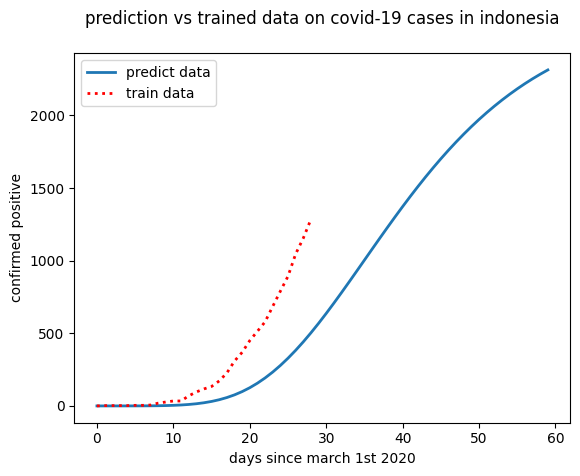

In [26]:
# gambar hasil prediksi ke dalam grafik/plot

plt.plot(x_train+x_test_added, y_pred, linewidth=2, label='predict data')
plt.plot(x, y, linewidth=2, color='r', linestyle='dotted', label='train data')
# Plt.Plot(X_test, Y_test, Linewidth=2, Color='G', Linestyle='Dotted', Label='Test Data')
plt.title('prediction vs trained data on covid-19 cases in indonesia\n')
plt.xlabel('days since march 1st 2020')
plt.ylabel('confirmed positive')
plt.legend(loc='upper left')

In [29]:
print(len(x_test_added))  # Panjang x_test_added
print(len(np.around(y_pred[36:])))  # Panjang y_pred[36:]


34
24


In [41]:
def gompertz(a, c, t, t_0):
    q = a * np.exp(-np.exp(-c * (t - t_0)))
    q = np.clip(q, a_min=0, a_max=1e6)  # Hindari overflow
    return q

x = list(df['days'])
y = list(df['cases'])

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, test_size=0.1, shuffle=False)
x_test_added = x_test + list(range((max(x_test) + 1), 60))

# Curve fitting
popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([100, 0, 0], [6 * max(y_train), 0.15, 70]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train + x_test_added, estimated_t_0)

# Ensure lengths match
y_pred_sliced = y_pred[-len(x_test_added):]

# Create DataFrame
prediksi = pd.DataFrame({'day_pred': x_test_added, 'cases_pred': np.around(y_pred_sliced)})
print(prediksi)


    day_pred  cases_pred
0         26       383.0
1         27       441.0
2         28       503.0
3         29       569.0
4         30       637.0
5         31       708.0
6         32       780.0
7         33       854.0
8         34       929.0
9         35      1004.0
10        36      1079.0
11        37      1154.0
12        38      1228.0
13        39      1301.0
14        40      1373.0
15        41      1442.0
16        42      1510.0
17        43      1576.0
18        44      1640.0
19        45      1702.0
20        46      1761.0
21        47      1817.0
22        48      1872.0
23        49      1923.0
24        50      1972.0
25        51      2019.0
26        52      2064.0
27        53      2106.0
28        54      2146.0
29        55      2183.0
30        56      2219.0
31        57      2252.0
32        58      2284.0
33        59      2313.0


<ipython-input-41-aa3d307ea2f0>:2: RuntimeWarning: overflow encountered in exp
  q = a * np.exp(-np.exp(-c * (t - t_0)))


VISUALISASI DATA PASIEN

In [44]:
pasien.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


In [45]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      893 non-null    int64  
 1   gender          156 non-null    object 
 2   age             156 non-null    float64
 3   nationality     156 non-null    object 
 4   province        156 non-null    object 
 5   current_state   166 non-null    object 
 6   contacted_with  27 non-null     float64
 7   confirmed_date  893 non-null    object 
 8   released_date   5 non-null      object 
 9   deceased_date   4 non-null      object 
 10  hospital        17 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB


In [46]:
pasien['current_state'].value_counts()

,count
current_state,
isolated,143
deceased,15
released,8


In [47]:
# rata-rata umur berdasarkan kolom gender

male = pasien.loc[pasien['gender']=='male','age'].mean()
female = pasien.loc[pasien['gender']=='female','age'].mean()
print('Distribusi Rata-Rata Umur Pasien Laki-Laki: %i' %male, 'Tahun')
print('Distribusi Rata-Rata Umur Pasien Perempuan: %i' %female, 'Tahun')

Distribusi Rata-Rata Umur Pasien Laki-Laki: 48 Tahun
Distribusi Rata-Rata Umur Pasien Perempuan: 47 Tahun


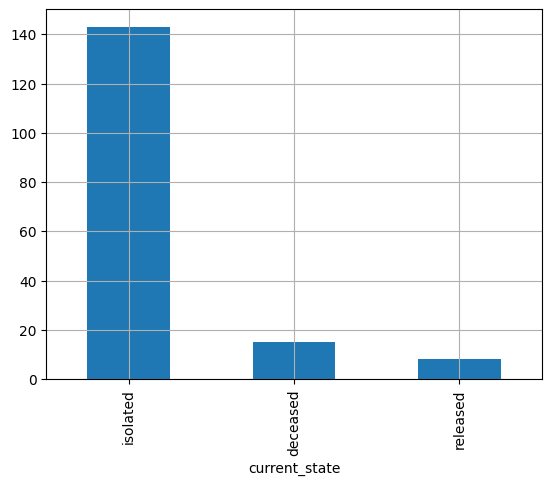

In [48]:
pasien.current_state.value_counts().plot.bar().grid()

<Axes: xlabel='gender', ylabel='count'>

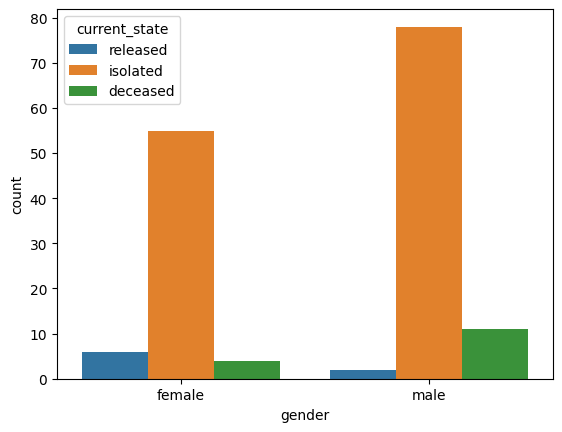

In [49]:
sns.countplot(x='gender', hue='current_state', data=pasien)

<Axes: xlabel='province'>

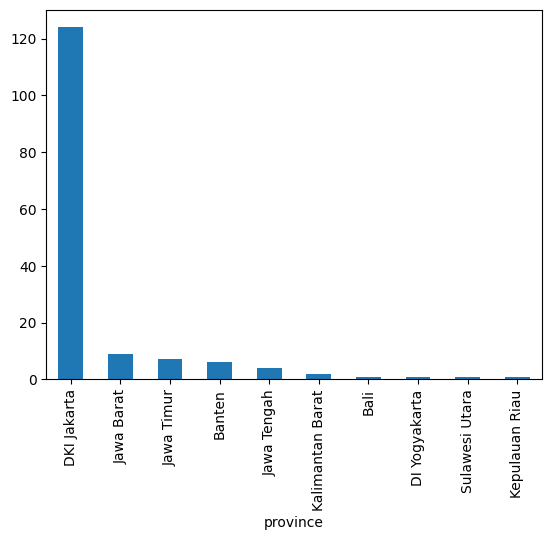

In [50]:
pasien.province.value_counts().plot.bar()

<Axes: xlabel='confirmed_date'>

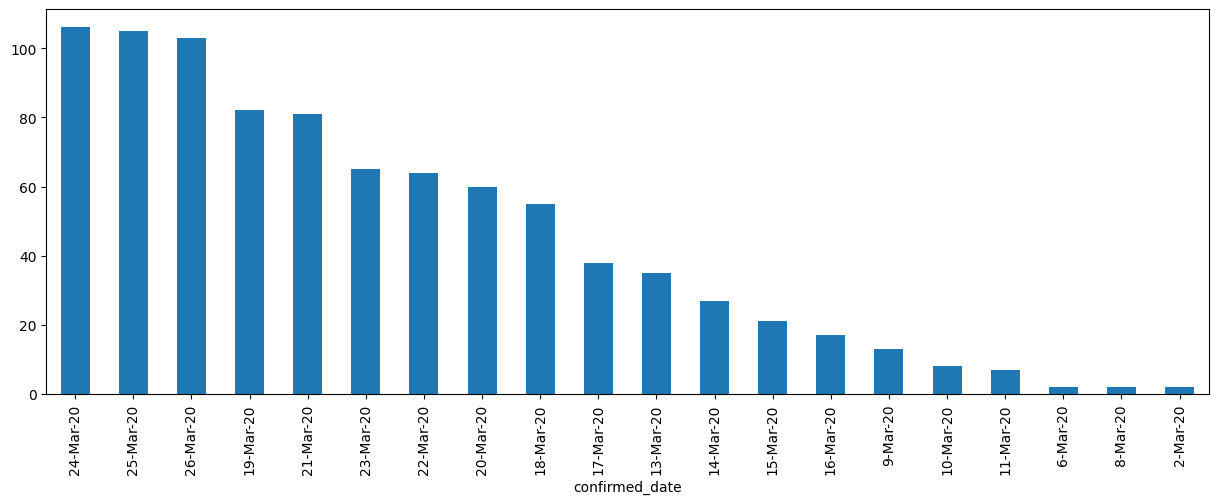

In [51]:
# pasien positif berdasarkan tanggal konfirmasinya

plt.figure(figsize=(15,5))
pasien.confirmed_date.value_counts().plot.bar()

VISUALISASI DATA PROVINSI

In [52]:
provinsi.head(5)

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [53]:
print("total data : ", provinsi.shape,"\n")
provinsi.info()

total data :  (35, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          35 non-null     int64 
 1   province_name        35 non-null     object
 2   island               35 non-null     object
 3   iso_code             35 non-null     object
 4   capital_city         35 non-null     object
 5   population           35 non-null     int64 
 6   population_kmsquare  35 non-null     int64 
 7   confirmed            35 non-null     int64 
 8   deceased             35 non-null     int64 
 9   released             35 non-null     int64 
 10  longitude            35 non-null     object
 11  latitude             35 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.4+ KB


In [54]:
provinsi['island'].value_counts()
#berdasarkan data pengelompokan pulau

,count
island,
Sumatra,10
Jawa,6
Sulawesi,6
Kalimantan,5
Kepulauan Nusa Tenggara,3
Kepulauan Maluku,2
Papua,2
Unknown,1


In [55]:
# Deklarasikan Sintak Atau Method Yang Digunakan Untuk Menghitung Banyaknya Jumlah Korban Yang Terkonfirmasi Covid-19.

#----------Group By---------------
def FungsiGroup(column, ds):
  dataset = ds
  print((dataset.groupby(column).sum()[['confirmed']]).sort_values(by=column, ascending=False))

In [56]:
FungsiGroup('island', provinsi)

                         confirmed
island                            
Unknown                         20
Sumatra                         29
Sulawesi                        35
Papua                            7
Kepulauan Nusa Tenggara         11
Kepulauan Maluku                 2
Kalimantan                      22
Jawa                           911


In [57]:
# linear regression

df =  pd.DataFrame((provinsi.groupby('island').sum()[['confirmed']]).sort_values(by='island', ascending=False))
df.head()

,confirmed
island,
Unknown,20
Sumatra,29
Sulawesi,35
Papua,7
Kepulauan Nusa Tenggara,11


In [58]:
df['island']=df.index
df.reset_index(drop=True, inplace=True)

In [59]:
df = df[['island', 'confirmed']]
df.head()

,island,confirmed
0,Unknown,20
1,Sumatra,29
2,Sulawesi,35
3,Papua,7
4,Kepulauan Nusa Tenggara,11


In [60]:
# grafik pie berdasarkan kolom island

import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = px.pie( values=df['confirmed'],names=df['island'])
fig.update_layout(font=dict(size=15, color="#242323"))

py.iplot(fig)

In [61]:
# copy dataset ke variabel baru

dataset = provinsi[['province_name', 'capital_city', 'population_kmsquare', 'confirmed', 'deceased']]
dataset.head()

,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


In [62]:
# cek banyaknya nilai null
dataset.isnull().sum()

,0
province_name,0
capital_city,0
population_kmsquare,0
confirmed,0
deceased,0


Linear Regresi Dataset Provinsi

In [63]:
dtLR = dataset.copy()
print(dtLR.shape)
dtLR.head()

(35, 5)


,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


In [65]:
#hapus kolom-kolom yang mempunyai relasi paling kecil

dtLR = dtLR.drop(['province_name','capital_city','population_kmsquare'], axis=1)
dtLR.head(5)

,confirmed,deceased
0,4,0
1,9,2
2,84,4
3,0,0
4,22,2


In [66]:
#-----Proses Linear Regression
x_LR=dtLR.iloc[:, :-1].values
y_LR=dtLR.iloc[:, 1].values

In [67]:
# testing dan training data

from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_LR, y_LR, test_size = 0.20, random_state = 0)

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_1, y_train_1)

LinearRegression()

In [69]:
#prediksi data testing

pred = regressor.predict(x_test_1)

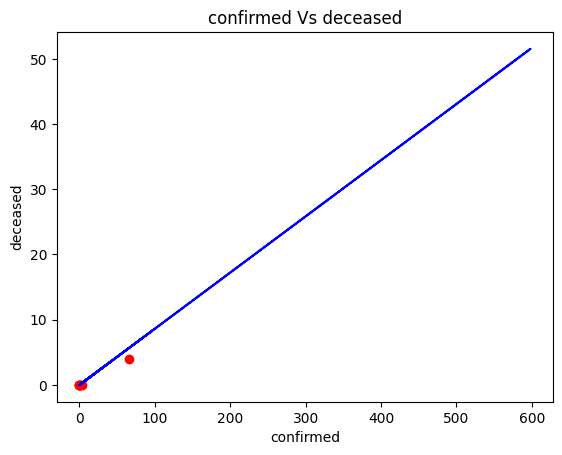

In [70]:
# sebaran data confirmed dan deceased

plt.scatter(x_test_1, y_test_1, color = 'red')
plt.plot(x_train_1, regressor.predict(x_train_1), color = 'blue' )
plt.title('confirmed Vs deceased')
plt.xlabel('confirmed')
plt.ylabel('deceased')
plt.show()

Prediksi SVM


Mean Squared Error: 0.3694131259218884


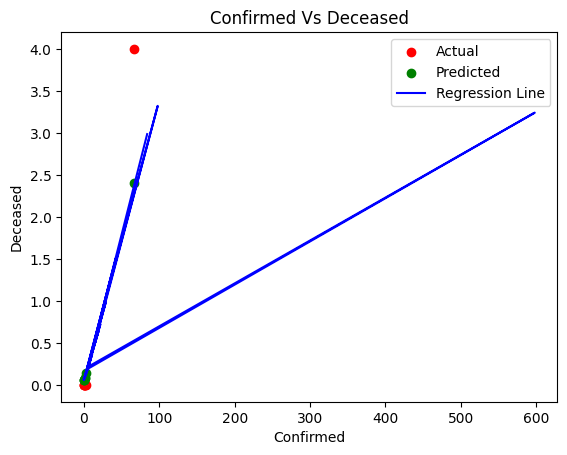

In [71]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and train SVM model for regression
regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
regressor.fit(x_train_1, y_train_1)

# Predict data testing
pred = regressor.predict(x_test_1)

# Calculate mean squared error
mse = mean_squared_error(y_test_1, pred)
print(f"Mean Squared Error: {mse}")

# Plot data confirmed vs deceased
plt.scatter(x_test_1, y_test_1, color='red', label='Actual')
plt.scatter(x_test_1, pred, color='green', label='Predicted')
plt.plot(x_train_1, regressor.predict(x_train_1), color='blue', label='Regression Line')
plt.title('Confirmed Vs Deceased')
plt.xlabel('Confirmed')
plt.ylabel('Deceased')
plt.legend()
plt.show()
